In [ ]:
import maze as mz
import numpy as np
import maze_qd as mz_qd
import maze_qe as mz_qe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [288]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])


In [296]:
# Create an environment maze
env = mz_qe.Maze(maze)


In [297]:
# Discount Factor 
gamma   = 1-1/30
# Accuracy treshold 
epsilon = 0.0001
V, policy = mz_qe.value_iteration(env, gamma, epsilon)

c:\Users\frede\OneDrive\Documents\KTH_2022_2023\EL2805_RL\Labs\lab1\problem1\maze_qe.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


'poison'

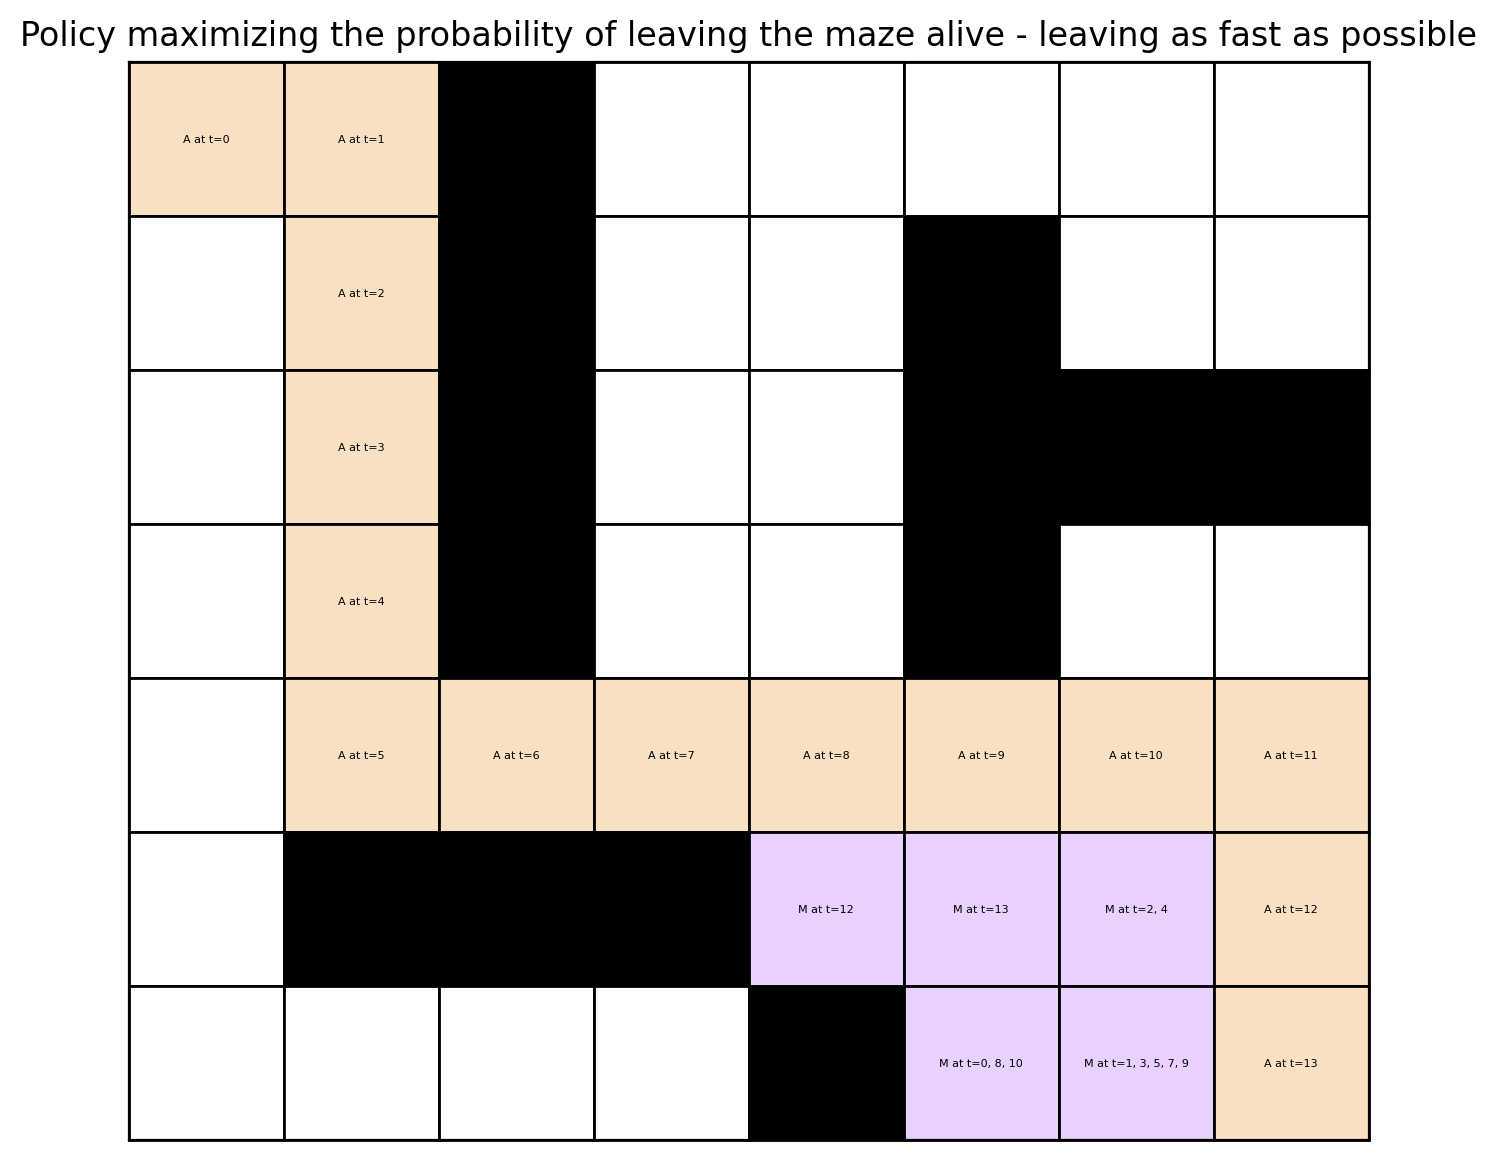

In [388]:
method = 'ValIter'
start  = (0, 0, 6, 5)
path = env.simulate(start, policy, method)
mz_qe.draw_path(maze, path)

In [350]:
env = mz_qe.Maze(maze)


tests = 1000000
scores = np.zeros((tests, ))
for i in range(0, tests):
    path = env.simulate(start, policy, method)
    outcome = mz_qe.analyze_policy(path, maze)
    if outcome=="HURRA":
        scores[i] = 1
    
    if outcome=="DEAD":
        scores[i] = -1
    
    if outcome=="POISON":
        scores[i] = -2

df = pd.DataFrame(scores)
scores = df.replace(-1, 0).replace(-2, 0)


Text(0.5, 1.0, 'Probability of getting out in function of horizon T')

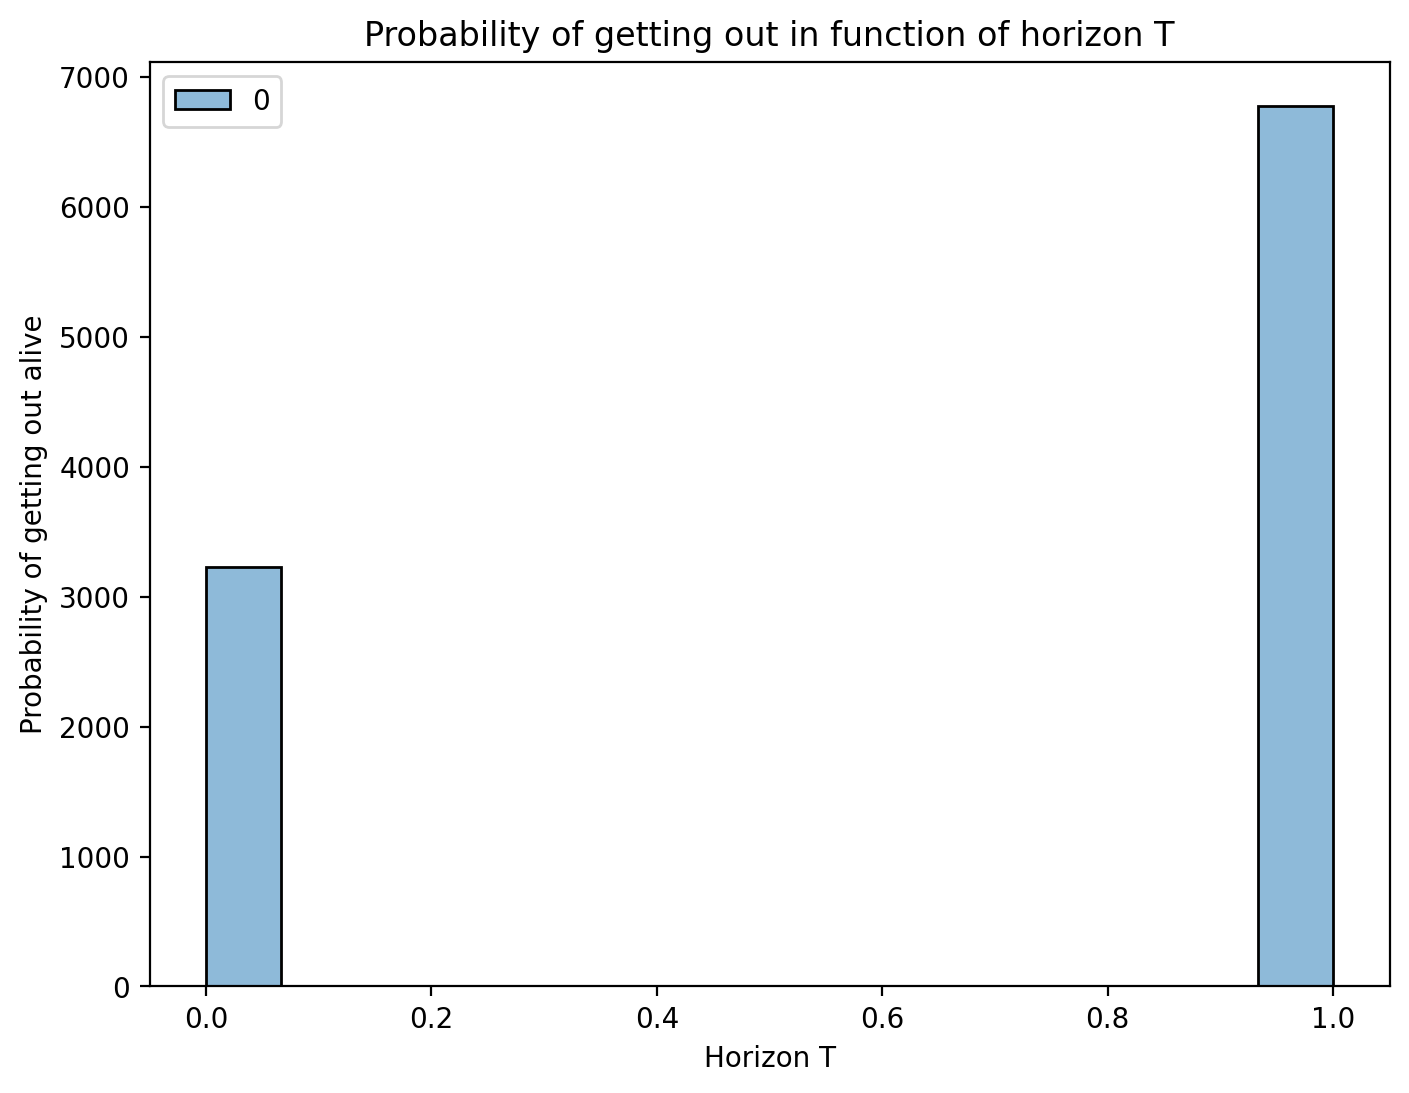

In [310]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.histplot(scores, ax=ax, label="Minotaur has to move")
ax.set_xlabel("Horizon T")
ax.set_ylabel("Probability of getting out alive")
ax.set_title("Probability of getting out in function of horizon T")

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

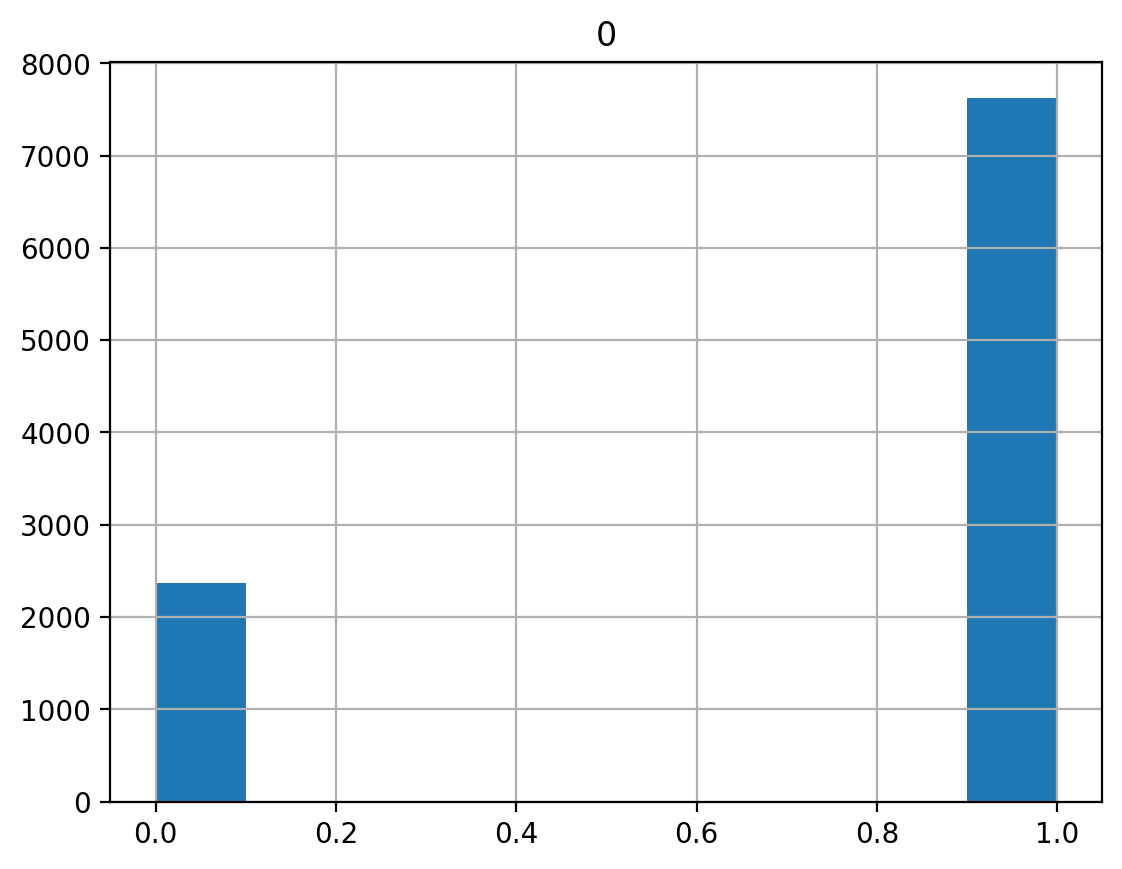

In [257]:
env = mz_qd.Maze(maze)

tests = 10000
scores = np.zeros((tests, ))
for i in range(0, tests):
    path = env.simulate(start, policy, method)
    outcome = mz_qd.analyze_policy(path, maze)
    if outcome=="HURRA":
        scores[i] = 1
    
    if outcome=="DEAD":
        scores[i] = -1

df = pd.DataFrame(scores)
df.replace(-1, 0).hist()

KeyboardInterrupt: 

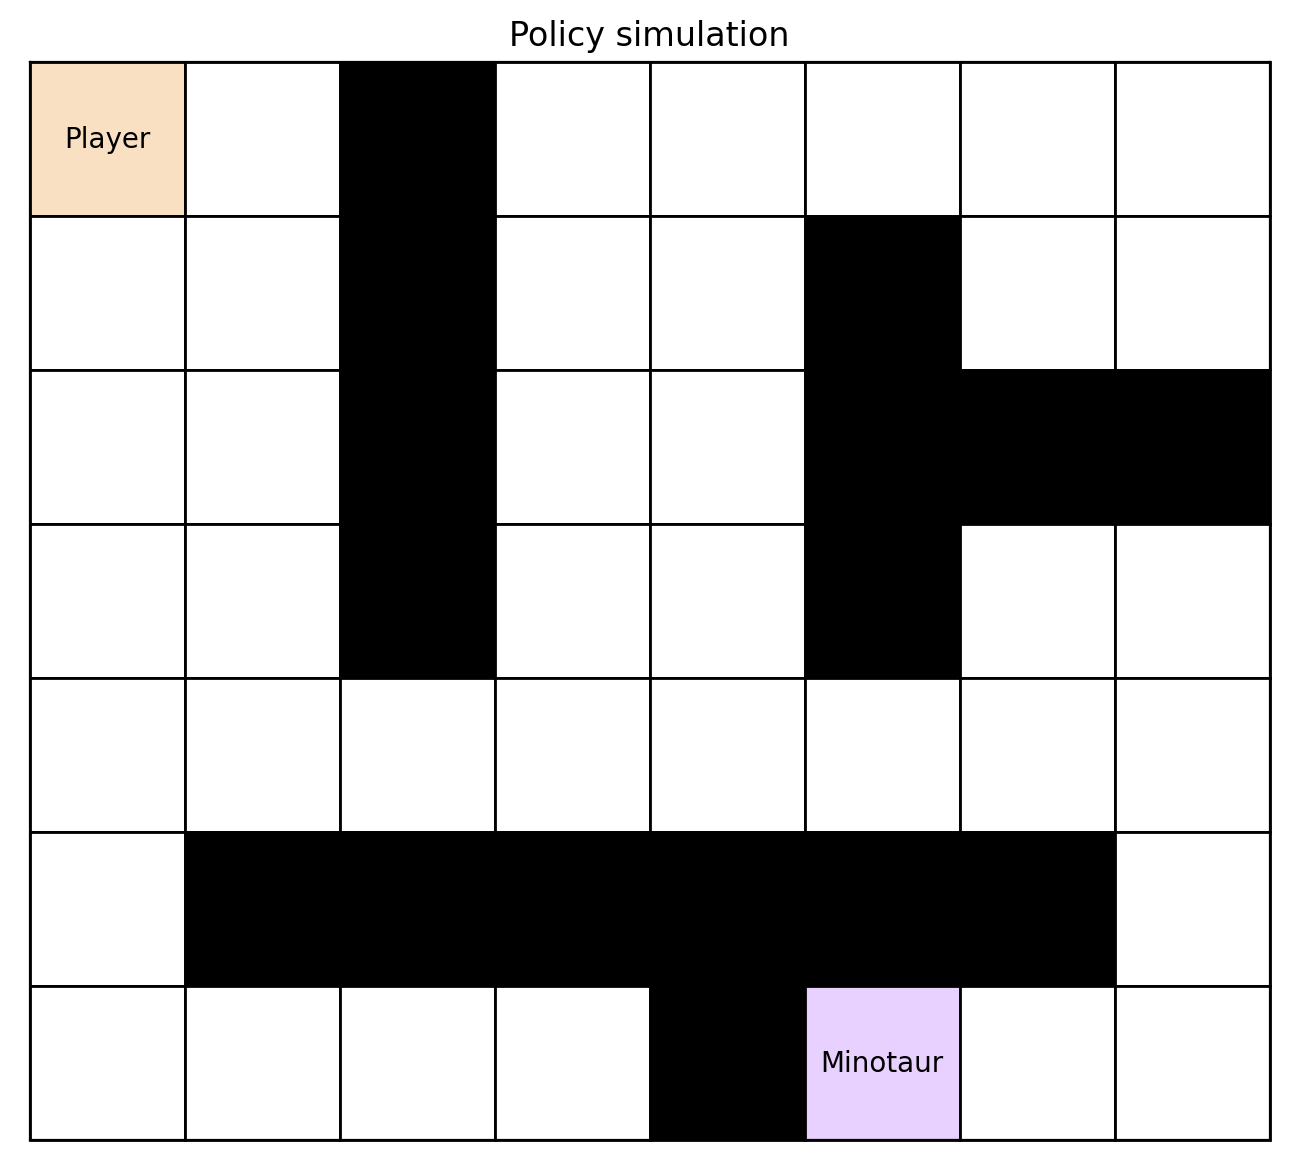

In [144]:
# Show the shortest path 
mz.animate_solution(maze, path)

In [197]:
path

[(0, 0, 6, 5),
 (0, 0, 6, 6),
 (0, 0, 6, 5),
 (0, 0, 5, 5),
 (0, 0, 5, 4),
 (0, 0, 4, 4),
 (1, 0, 3, 4),
 (1, 1, 3, 3),
 (2, 1, 4, 3),
 (2, 1, 5, 3),
 (3, 1, 5, 2),
 (3, 1, 4, 2),
 (3, 1, 4, 1),
 (3, 0, 3, 1),
 (3, 0, 3, 2),
 (3, 1, 3, 3),
 (3, 1, 2, 3),
 (3, 0, 3, 3),
 (3, 1, 3, 2),
 (3, 1, 4, 2),
 (3, 1, 5, 2),
 (3, 1, 5, 3),
 (3, 0, 5, 2),
 (3, 0, 4, 2),
 (3, 0, 5, 2),
 (3, 0, 5, 3),
 (3, 0, 5, 2),
 (3, 0, 5, 1),
 (3, 0, 6, 1),
 (3, 0, 6, 2),
 (3, 1, 6, 3),
 (3, 0, 6, 2),
 (3, 1, 5, 2),
 (3, 1, 6, 2),
 (2, 1, 6, 1),
 (2, 1, 6, 2),
 (2, 1, 6, 1),
 (2, 1, 6, 0),
 (2, 0, 5, 0),
 (3, 0, 5, 1),
 (3, 0, 4, 1),
 (3, 0, 4, 2),
 (3, 0, 4, 3),
 (3, 0, 5, 3),
 (3, 0, 5, 4),
 (4, 0, 4, 4),
 (4, 0, 4, 3),
 (4, 0, 3, 3),
 (4, 1, 4, 3),
 (4, 1, 5, 3),
 (4, 1, 4, 3)]

In [93]:
env.(0, 1)

AttributeError: 'Maze' object has no attribute '__move'